# miscellaneous & unused

# Used code

##Preprocessing

In [ ]:
root_dir = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split'

In [ ]:
#!chmod -R 755 /content/drive/MyDrive/ISIC\ skin\ cancer\ challenge\ 2024/train-image/image
'''for if keras loading dataset doesn't work'''

"for if keras loading dataset doesn't work"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 16     # @param
train_data_dir = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/train'
val_data_dir = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/val'
test_data_dir = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test'
nb_epochs = 50     # @param
rotation_range = 40 # @param
shear_range = 0.3 # @param
zoom_range = 0.3 # @param {"type":"number"}
L2_reg_parameter = 0.005 # @param

datagen = ImageDataGenerator(rescale=1./255,
                rotation_range=rotation_range,
                shear_range=shear_range,
                zoom_range=zoom_range,
                samplewise_center=True,
                samplewise_std_normalization=True,
                horizontal_flip=True,
                )

train_generator = datagen.flow_from_directory(
    train_data_dir,
    shuffle=True,
    seed=42,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    )

val_generator = datagen.flow_from_directory(
    val_data_dir,
    shuffle=True,
    seed=42,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    )

test_dataset = image_dataset_from_directory(
    test_data_dir,
    shuffle=False,
    batch_size=batch_size,
    #image_size=(224,224),
    #label_mode='binary',
    #seed=42
    )


Found 9932 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
steps_per_epoch = train_generator.samples // batch_size // 4
validation_steps = val_generator.samples // batch_size // 4

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import regularizers
!pip install ops
from tensorflow.keras import ops


early_stopping = EarlyStopping(monitor='precision',
                         patience=10,
                         verbose=1,
                         restore_best_weights=True
                         )


def scheduler(epoch, lr):                                                     #added this
     if epoch < 10:
         return float(lr)
     else:
         return float(lr * ops.exp(-0.1))


learn_rate_scheduler = LearningRateScheduler(scheduler, verbose=1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 1.7 MB/s eta 0:00:00


ImportError: cannot import name 'ops' from 'tensorflow.keras' (/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/__init__.py)

## Classification models

### CNN

####creating the model

In [ ]:
def create_cnn_model():
  # Model Architecture
  model_cnn = Sequential()
  model_cnn.add(Input(shape=(224, 224, 3)))

  model_cnn.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(L2_reg_parameter)))
  model_cnn.add(BatchNormalization())
  model_cnn.add(Activation('relu'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

  model_cnn.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(L2_reg_parameter)))
  model_cnn.add(BatchNormalization())
  model_cnn.add(Activation('relu'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

  model_cnn.add(Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(L2_reg_parameter)))
  model_cnn.add(BatchNormalization())
  model_cnn.add(Activation('relu'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

  model_cnn.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(L2_reg_parameter)))
  model_cnn.add(BatchNormalization())
  model_cnn.add(Activation('relu'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

  model_cnn.add(Flatten())  # Flatten to 1D
  model_cnn.add(Dense(64, kernel_regularizer=regularizers.l2(L2_reg_parameter)))  # Fully connected layer
  model_cnn.add(Activation('relu'))
  model_cnn.add(Dropout(0.5))  # Dropout for regularization

  model_cnn.add(Dense(1, activation='relu'))

  model_cnn.summary()

  # Compile the model
  model_cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4), #changed from Adam(learning_rate=1e-3)
              metrics=['accuracy', 'precision', 'AUC'])

  return model_cnn


'''
note to self: adam works better than SGD,
batch-normalization is making the model worse

'''

model = create_cnn_model()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 628,481 (2.40 MB)

 Trainable params: 628,161 (2.40 MB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
for images, labels in test_dataset.take(1):
    print(f"Images shape: {images.shape}")
    print(f"Labels shape: {labels.shape}")

Images shape: (16, 224, 224, 3)
Labels shape: (16, 1)


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[learn_rate_scheduler], #early_stopping
    verbose=1,
    epochs=nb_epochs
    )

try_num = 9 # @param
# Save the model weights after training
model.save_weights(f'/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/model_weights/try_{try_num}.weights.h5')   #best one yet is second_try.weights.h5




Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 1724s 11s/step - AUC: 0.5534 - accuracy: 0.5439 - loss: 7.6597 - precision: 0.5436 - val_AUC: 0.5866 - val_accuracy: 0.5578 - val_loss: 7.3153 - val_precision: 0.7376 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1179s 8s/step - AUC: 0.6483 - accuracy: 0.6417 - loss: 6.5214 - precision: 0.6203 - val_AUC: 0.7010 - val_accuracy: 0.6855 - val_loss: 5.6230 - val_precision: 0.6618 - learning_rate: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 932s 6s/step - AUC: 0.6421 - accuracy: 0.6353 - loss: 6.6819 - precision: 0.6002 - val_AUC: 0.6908 - val_accuracy: 0.6835 - val_loss: 5.8771 - val_precision: 0.6683 - learning_rate: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 698s 5s/step - AUC: 0.6875 - 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


155/155 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - AUC: 0.7143 - accuracy: 0.6875 - loss: 5.0931 - precision: 0.6429 - val_AUC: 0.7565 - val_accuracy: 0.7500 - val_loss: 5.0498 - val_precision: 0.6774 - learning_rate: 1.0000e-04

Epoch 6: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 692s 4s/step - AUC: 0.6236 - accuracy: 0.6191 - loss: 6.9442 - precision: 0.5755 - val_AUC: 0.7022 - val_accuracy: 0.7009 - val_loss: 5.7565 - val_precision: 0.6531 - learning_rate: 1.0000e-04

Epoch 7: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 594s 4s/step - AUC: 0.6669 - accuracy: 0.6622 - loss: 6.3476 - precision: 0.6111 - val_AUC: 0.7083 - val_accuracy: 0.7030 - val_loss: 5.7148 - val_precision: 0.6508 - learning_rate: 1.0000e-04

Epoch 8: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - AUC: 0.7035 - acc

In [ ]:
model.evaluate(test_dataset,
               verbose=True)

ValueError: Cannot take the length of shape with unknown rank.

#### loading the model

In [ ]:
model = create_cnn_model()

model.load_weights("/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/model_weights/try_9.weights.h5")

# Re-evaluate the model
model.evaluate(test_dataset,
               steps=200//batch_size,
               verbose=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 627,841 (2.40 MB)

 Trainable params: 627,841 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - AUC: 0.5000 - accuracy: 0.4821 - loss: 8.8323 - precision: 0.4821


[8.630258560180664, 0.4947916567325592, 0.4947916567325592, 0.5]

### ResNet

In [ ]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model


# Load pre-trained MobileNetV2 without the top layer
base = ResNet152(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers
for layer in base.layers:
    layer.trainable = False

x = Flatten()(base.output)
x = Dense(128, kernel_regularizer=regularizers.l2(L2_reg_parameter))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='relu')(x)


resnet = Model(base.input, output)

# Compile the model
resnet.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy', 'precision', 'AUC'])


In [ ]:
resnet.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    #callbacks=[early_stopping],
    verbose=1,
    epochs=nb_epochs
    )

resnet.evaluate(test_dataset, steps=test_dataset.samples // test_dataset.batch_size)
resnet.save_weights('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/model_weights/resnet_try3.weights.h5')

### YOLO v8

In [ ]:
%pip install ultralytics  # install
from ultralytics import YOLO, checks, hub
import os
import pandas as pd
import random as rd

checks()  # checks

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.0+cpu CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (96 CPUs, 334.6 GB RAM, 17.3/225.3 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
from ultralytics import YOLO

# Login to Ultralytics hub
hub.login("24a150c74eed1c7ed623a476ec9a444cf2a5c027cf")

# Load the model
model = YOLO("https://hub.ultralytics.com/models/E3y6r8U7zYsBOnqtYjgC")

# Set the directory where the images are located
image_dir = '/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test'

# Load the test metadata CSV file
df_test = pd.read_csv('/content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/metadata_test.csv')

# Initialize lists for predictions and true labels
val_pred = []
val_true = []

# Iterate through the dataframe, making sure we use the correct isic_id for each image
for idx, row in df_test.iterrows():
    isic_id = row['isic_id']  # Get the isic_id from the dataframe
    label = row['benign_malignant_binary']  # True label (benign or malignant)

    # Build the path to the image using the isic_id
    image_path = os.path.join(image_dir, isic_id)

    # Run the image through the model to get predictions
    results = model(image_path)

    # Store the top1 probability from the model
    for r in results:
        val_pred.append(r.probs.top1)  # Append the top1 probability prediction

    # Store the true label
    val_true.append(label)

# Now val_pred and val_true should be aligned


Ultralytics HUB: New authentication successful ✅
Loading trained HUB model https://hub.ultralytics.com/models/E3y6r8U7zYsBOnqtYjgC 🚀
Found https://storage.googleapis.com/ultralytics-hub.appspot.com/users/p0Y2DiIGCsdwHsAqWIGNzPKK5pi2/models/E3y6r8U7zYsBOnqtYjgC/best.pt locally at weights/hub/E3y6r8U7zYsBOnqtYjgC/best.pt

image 1/1 /content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test/ISIC_0032424.jpg: 256x256 malignant 0.98, benign 0.02, 11.5ms
Speed: 4.9ms preprocess, 11.5ms inference, 0.1ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test/ISIC_0032751.jpg: 256x256 malignant 0.82, benign 0.18, 9.9ms
Speed: 4.5ms preprocess, 9.9ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 /content/drive/MyDrive/ISIC skin cancer challenge 2024/Normal_data/skin_images_split/test/ISIC_0027455.jpg: 256x256 benign 0.76, malignant 0.24, 11.0m

In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(classification_report(val_true, val_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       100
           1       0.89      0.85      0.87       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [ ]:
precision_recall_fscore_support(val_true, val_pred)

(array([    0.85714,     0.89474]),
 array([        0.9,        0.85]),
 array([    0.87805,     0.87179]),
 array([100, 100]))

<Axes: >

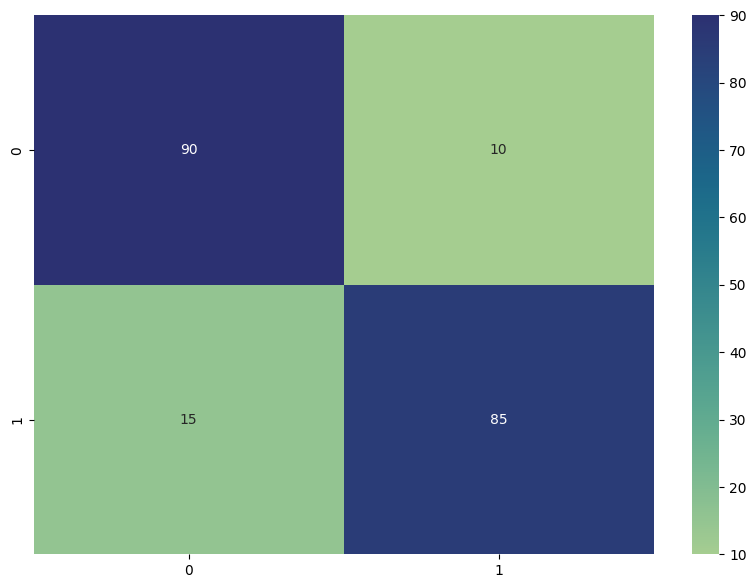

In [ ]:

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(val_true, val_pred), annot=True, cmap='crest')